In [1]:
import pandas as pd
import numpy as np
import re
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Loading data set
Base_Data=pd.read_csv('day.csv')

In [3]:
# Checking head of data set
Base_Data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [4]:
# Checking Null value in the data set
Base_Data.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [5]:
# Checking if casual + Register is equal to count or not
sum((Base_Data['casual']+Base_Data['registered'])==Base_Data['cnt'])==len(Base_Data)

# That means we have two type pf output variables here
# People who are taking rental without registeration
# People who are taking rental after registration
print("Event_Distribution")
print("*"*50)
print("Overall")
print(Base_Data['cnt'].describe())
print("*"*50)
print("Casual")
print(Base_Data['casual'].describe())
print("*"*50)
print("Registered")
print(Base_Data['registered'].describe())



Event_Distribution
**************************************************
Overall
count     730.000000
mean     4508.006849
std      1936.011647
min        22.000000
25%      3169.750000
50%      4548.500000
75%      5966.000000
max      8714.000000
Name: cnt, dtype: float64
**************************************************
Casual
count     730.000000
mean      849.249315
std       686.479875
min         2.000000
25%       316.250000
50%       717.000000
75%      1096.500000
max      3410.000000
Name: casual, dtype: float64
**************************************************
Registered
count     730.000000
mean     3658.757534
std      1559.758728
min        20.000000
25%      2502.250000
50%      3664.500000
75%      4783.250000
max      6946.000000
Name: registered, dtype: float64


In [6]:
# Checking describe for all the continuous variables
Base_Data.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


# Variable Description
- instant: record index
- dteday : date
- season : season (1:spring, 2:summer, 3:fall, 4:winter)
- yr : year (0: 2018, 1:2019)
- mnth : month ( 1 to 12)
- holiday : weather day is a holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)
- weekday : day of the week
- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
+ weathersit : 
    - 1: Clear, Few clouds, Partly cloudy, Partly cloudy
    - 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
    - 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
    - 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
- temp : temperature in Celsius
- atemp: feeling temperature in Celsius
- hum: humidity
- windspeed: wind speed
- casual: count of casual users
- registered: count of registered users
- cnt: count of total rental bikes including both casual and registered

In [7]:
Base_Data.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [8]:
# Dropping registered and casual as adding this two give cnt 
Base_Data.drop(['registered','casual'],inplace=True,axis=1)

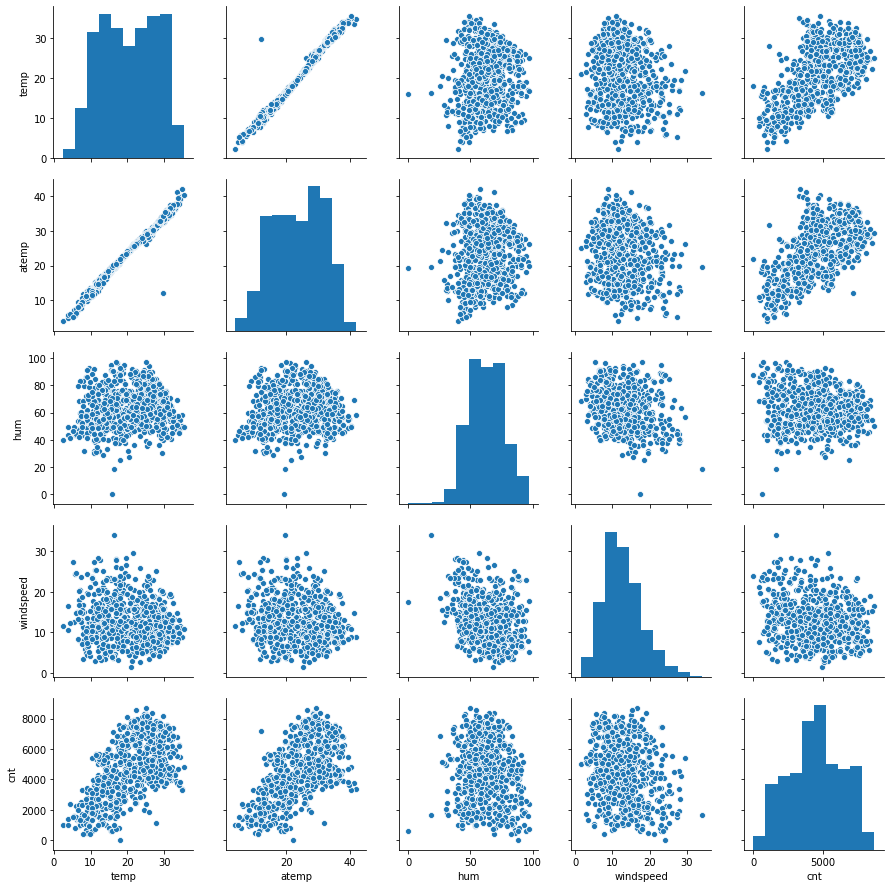

In [9]:
# Seeing disribution of all the continuos variables accross event(cnt)
clms=['temp', 'atemp', 'hum', 'windspeed','cnt']
sns.pairplot(Base_Data[clms])
plt.show()

               temp     atemp       hum  windspeed       cnt
temp       1.000000  0.991696  0.128565  -0.158186  0.627044
atemp      0.991696  1.000000  0.141512  -0.183876  0.630685
hum        0.128565  0.141512  1.000000  -0.248506 -0.098543
windspeed -0.158186 -0.183876 -0.248506   1.000000 -0.235132
cnt        0.627044  0.630685 -0.098543  -0.235132  1.000000


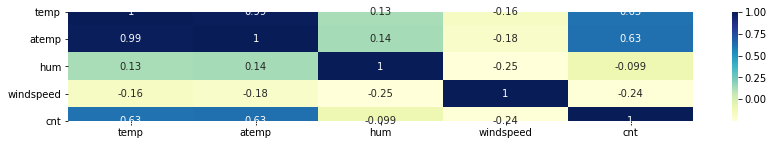

==> Temp and atemp are positively correlated with event cnt
==> temp and atemp are also highly correlated
==> Humidity and windspeed are negatively correlated. And Humidity correlation is very less.


In [10]:
clms=['temp', 'atemp', 'hum', 'windspeed','cnt']
corrr=Base_Data[clms].corr()

print(Base_Data[clms].corr())
# plotting correlation heatmap
plt.figure(figsize=(14,2))
dataplot = sns.heatmap(corrr, cmap="YlGnBu", annot=True)
  
# displaying heatmap
plt.show()

print("==> Temp and atemp are positively correlated with event cnt")
print("==> temp and atemp are also highly correlated")
print("==> Humidity and windspeed are negatively correlated. And Humidity correlation is very less.")

****************************************************************************************************
season VS Cnt


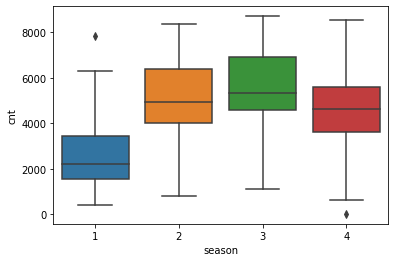

                cnt
season             
1       2608.411111
2       4992.331522
3       5644.303191
4       4728.162921
****************************************************************************************************
yr VS Cnt


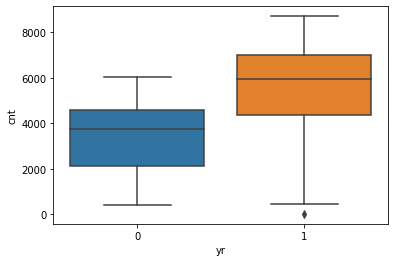

            cnt
yr             
0   3405.761644
1   5610.252055
****************************************************************************************************
mnth VS Cnt


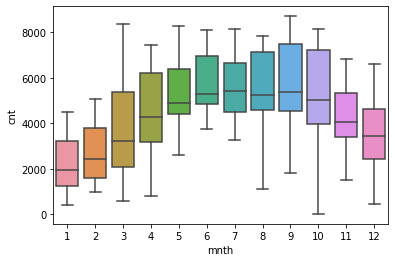

              cnt
mnth             
1     2176.338710
2     2669.964286
3     3692.258065
4     4484.900000
5     5349.774194
6     5772.366667
7     5563.677419
8     5664.419355
9     5766.516667
10    5199.225806
11    4247.183333
12    3403.806452
****************************************************************************************************
holiday VS Cnt


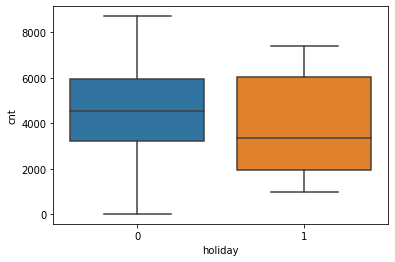

                cnt
holiday            
0        4530.90268
1        3735.00000
****************************************************************************************************
weekday VS Cnt


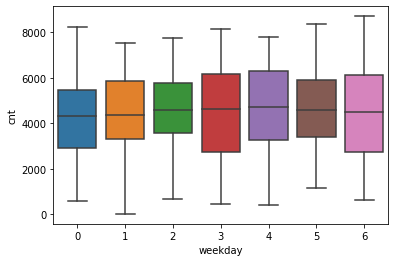

                 cnt
weekday             
0        4228.828571
1        4338.123810
2        4510.663462
3        4574.893204
4        4667.259615
5        4690.288462
6        4550.542857
****************************************************************************************************
workingday VS Cnt


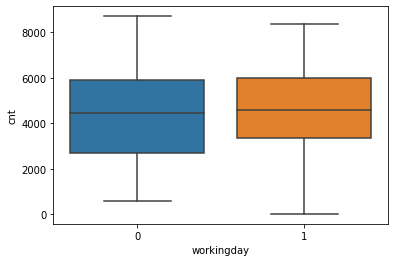

                    cnt
workingday             
0           4330.168831
1           4590.332665
****************************************************************************************************
weathersit VS Cnt


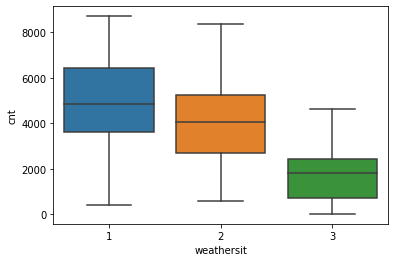

                    cnt
weathersit             
1           4876.786177
2           4044.813008
3           1803.285714


In [11]:
# Seeing boxplot for categorical variables
clms=['season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit']

for i in clms:
    print("*"*100)
    print(i + " VS " + "Cnt")
    sns.boxplot(x=i,y="cnt",data=Base_Data)
    plt.show()
    print(Base_Data.groupby(i).agg({'cnt':'mean'}))

In [12]:
# Changing date to date format
Base_Data['dteday']=pd.to_datetime(Base_Data['dteday'],format="%d-%m-%Y")

# Changing variable to one hot encoded variables
# and dropping on extra variable which will be define by other categories
print(Base_Data['season'].value_counts())
print(Base_Data['weathersit'].value_counts())
clms=['season', 'weathersit']
Base_Data = pd.get_dummies(Base_Data, columns = clms,drop_first=True)

3    188
2    184
1    180
4    178
Name: season, dtype: int64
1    463
2    246
3     21
Name: weathersit, dtype: int64


In [13]:
df_train,df_test=train_test_split(Base_Data,train_size=0.7,test_size=0.3,random_state=43)

In [14]:
# Checking for event distribution in train set
df_train['cnt'].describe()

count     510.000000
mean     4479.549020
std      1968.347795
min        22.000000
25%      3068.000000
50%      4531.000000
75%      5896.250000
max      8395.000000
Name: cnt, dtype: float64

In [15]:
# # Checking for event distribution in test set
df_test['cnt'].describe()

count     219.000000
mean     4580.922374
std      1863.008300
min       623.000000
25%      3503.500000
50%      4585.000000
75%      6008.500000
max      8714.000000
Name: cnt, dtype: float64

In [16]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()

In [17]:
df_train.columns

Index(['instant', 'dteday', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'temp', 'atemp', 'hum', 'windspeed', 'cnt', 'season_2', 'season_3',
       'season_4', 'weathersit_2', 'weathersit_3'],
      dtype='object')

In [18]:
clms=['yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'temp', 'atemp', 'hum', 'windspeed', 'cnt', 'season_2', 'season_3',
       'season_4', 'weathersit_2', 'weathersit_3']

df_train[clms]=scaler.fit_transform(df_train[clms])
df_train.head()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


,instant,dteday,yr,mnth,holiday,weekday,workingday,temp,atemp,hum,windspeed,cnt,season_2,season_3,season_4,weathersit_2,weathersit_3
534,535,2019-06-19,1.0,0.454545,0.0,0.333333,1.0,0.784017,0.770268,0.639936,0.258983,0.812493,1.0,0.0,0.0,0.0,0.0
269,270,2018-09-27,0.0,0.727273,0.0,0.333333,1.0,0.719639,0.662993,0.889007,0.197454,0.489430,0.0,0.0,1.0,1.0,0.0
270,271,2018-09-28,0.0,0.727273,0.0,0.500000,1.0,0.717562,0.663840,0.842273,0.260245,0.463991,0.0,0.0,1.0,1.0,0.0
145,146,2018-05-26,0.0,0.363636,0.0,0.666667,1.0,0.808938,0.770263,0.624004,0.365411,0.555954,1.0,0.0,0.0,0.0,0.0
502,503,2019-05-18,1.0,0.363636,0.0,0.833333,1.0,0.629300,0.631675,0.427509,0.235894,0.909710,1.0,0.0,0.0,0.0,0.0


In [19]:
# Checking VIF
clms=['yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'temp', 'atemp', 'hum', 'windspeed','season_2', 'season_3',
       'season_4', 'weathersit_2', 'weathersit_3']

from statsmodels.stats.outliers_influence import variance_inflation_factor
tmp=True

while(tmp==True):
    vif=pd.DataFrame()
    x=df_train[clms]
    vif['Feature']=x.columns
    vif['VIF']=[variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
    vif['VIF']=round(vif['VIF'],2)
    print("*"*100)
    print(vif.sort_values('VIF',ascending=False))
    print(clms)
    if max(vif['VIF'])<=5:
        tmp=False
    else:
        clms.remove(vif.sort_values('VIF',ascending=False)['Feature'].iloc[0])

****************************************************************************************************
         Feature      VIF
6          atemp  1197.14
5           temp  1191.17
7            hum    14.06
1           mnth    11.01
10      season_3     7.15
11      season_4     5.68
8      windspeed     4.36
9       season_2     3.57
4     workingday     3.45
3        weekday     3.05
12  weathersit_2     2.29
0             yr     1.97
13  weathersit_3     1.29
2        holiday     1.13
['yr', 'mnth', 'holiday', 'weekday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed', 'season_2', 'season_3', 'season_4', 'weathersit_2', 'weathersit_3']
****************************************************************************************************
         Feature    VIF
5           temp  21.24
6            hum  13.32
1           mnth  11.01
9       season_3   7.07
10      season_4   5.66
7      windspeed   4.19
8       season_2   3.56
4     workingday   3.43
3        weekday   3.05
11  weathers

In [20]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

y_train=df_train[['cnt']]
x_train=df_train[clms]

lm=LinearRegression()
lm.fit(x_train,y_train)
rfe=RFE(lm,8)
rfe.fit(x_train,y_train)

print(list(zip(x_train.columns,rfe.support_,rfe.ranking_)))

[('yr', True, 1), ('holiday', False, 3), ('weekday', True, 1), ('workingday', False, 2), ('windspeed', True, 1), ('season_2', True, 1), ('season_3', True, 1), ('season_4', True, 1), ('weathersit_2', True, 1), ('weathersit_3', True, 1)]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [21]:
clms=['yr', 'weekday','windspeed', 'season_2', 'season_3', 'season_4', 'weathersit_2', 'weathersit_3']
# dividing data in x_train and y_train

y_train=df_train[['cnt']]
x_train=df_train[clms]

import statsmodels.api as sm
x_train_rfe=sm.add_constant(x_train[clms])
lm=sm.OLS(y_train,x_train_rfe).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.758
Model:                            OLS   Adj. R-squared:                  0.754
Method:                 Least Squares   F-statistic:                     196.2
Date:                Wed, 14 Sep 2022   Prob (F-statistic):          5.06e-149
Time:                        03:51:37   Log-Likelihood:                 377.05
No. Observations:                 510   AIC:                            -736.1
Df Residuals:                     501   BIC:                            -698.0
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.2651      0.020     13.350   

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [22]:
# tmp have very high vif but it is also highly correlated with our event trying to add temp while removing season_3
# We will is the performance of the model is increasing or not
# We will see the performance based on r2 and adjusted r2 value
# In previous case r2 value is 0.758 and r2 adjusted is 0.754

clms=['yr','weekday','windspeed', 'season_2', 'season_4', 'weathersit_2', 'weathersit_3',
     'temp']

vif=pd.DataFrame()
x=df_train[clms]
vif['Feature']=x.columns
vif['VIF']=[variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
vif['VIF']=round(vif['VIF'],2)
print("*"*100)
print(vif.sort_values('VIF',ascending=False))
print(clms)

# dividing data in x_train and y_train

y_train=df_train[['cnt']]
x_train=df_train[clms]

import statsmodels.api as sm
x_train_rfe=sm.add_constant(x_train[clms])
lm=sm.OLS(y_train,x_train_rfe).fit()
print(lm.summary())

****************************************************************************************************
        Feature   VIF
7          temp  4.04
2     windspeed  3.65
1       weekday  2.85
0            yr  1.94
3      season_2  1.51
5  weathersit_2  1.47
4      season_4  1.37
6  weathersit_3  1.08
['yr', 'weekday', 'windspeed', 'season_2', 'season_4', 'weathersit_2', 'weathersit_3', 'temp']
                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.819
Model:                            OLS   Adj. R-squared:                  0.816
Method:                 Least Squares   F-statistic:                     283.2
Date:                Wed, 14 Sep 2022   Prob (F-statistic):          1.93e-180
Time:                        03:51:38   Log-Likelihood:                 450.93
No. Observations:                 510   AIC:                            -883.9
Df Residuals:                     501   BIC:         

In [23]:
# As r2 value has been increased to 0.819 and adjusted r2 value is increase to 0.816
# keeping temp in final variable list
# all the variables hvae p value which is less than 0.05
# so keeping all the variables
# checking the output on test dataset whether it is holding or not

In [24]:
# Residual analysis of train set
y_train_cnt=lm.predict(x_train_rfe)

Text(0.5, 0, 'Errors')

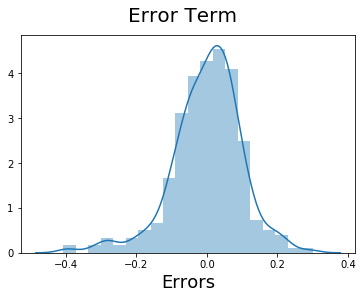

In [25]:
fig=plt.figure()
sns.distplot((y_train['cnt'] - y_train_cnt),bins=20)
fig.suptitle('Error Term',fontsize=20)
plt.xlabel('Errors',fontsize=18)

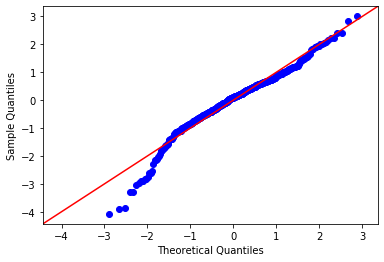

In [26]:
from statsmodels.api import qqplot
import scipy.stats as stats
qqplot((y_train['cnt'] - y_train_cnt),line='45',fit=True,dist=stats.norm)
plt.show()

In [27]:
# Residual looks almost normal
# applying the model on test data set

In [28]:
# Scalling test data set
clms=['yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'temp', 'atemp', 'hum', 'windspeed', 'cnt', 'season_2', 'season_3',
       'season_4', 'weathersit_2', 'weathersit_3']

df_test[clms]=scaler.transform(df_test[clms])
df_test.head()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


,instant,dteday,yr,mnth,holiday,weekday,workingday,temp,atemp,hum,windspeed,cnt,season_2,season_3,season_4,weathersit_2,weathersit_3
335,336,2018-12-02,0.0,1.000000,0.0,0.833333,1.0,0.317788,0.337700,0.558151,0.161548,0.467933,0.0,0.0,1.0,0.0,0.0
683,684,2019-11-15,1.0,0.909091,0.0,0.666667,1.0,0.327133,0.328412,0.551248,0.269229,0.647677,0.0,0.0,1.0,1.0,0.0
435,436,2019-03-12,1.0,0.181818,0.0,0.166667,1.0,0.507811,0.509195,0.383962,0.382050,0.630121,0.0,0.0,0.0,0.0,0.0
721,722,2019-12-23,1.0,1.000000,0.0,0.000000,0.0,0.232641,0.241404,0.417419,0.228196,0.210797,0.0,0.0,0.0,0.0,0.0
388,389,2019-01-24,1.0,0.000000,0.0,0.333333,1.0,0.353092,0.361351,0.825809,0.208991,0.515586,0.0,0.0,0.0,0.0,0.0


In [29]:
# Dividing the data in input and output variables
clms=['yr','weekday','windspeed', 'season_2', 'season_4', 'weathersit_2', 'weathersit_3',
     'temp']
# clms=['yr', 'holiday', 'weekday', 'workingday', 'windspeed', 'season_2', 'season_3', 'season_4', 'weathersit_2', 'weathersit_3']
y_test=df_test[['cnt']]
x_test=df_test[clms]
# Adiing constant
x_test_rfe=sm.add_constant(x_test[clms])
# Making prediction
y_test_cnt=lm.predict(x_test_rfe)


C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


Text(0, 0.5, 'Y_Predicted')

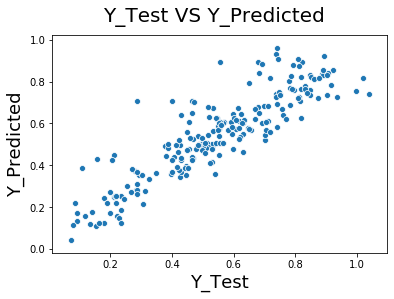

In [30]:
# Model Evaluation
fig=plt.figure()
sns.scatterplot(y_test['cnt'],y_test_cnt)
fig.suptitle('Y_Test VS Y_Predicted',fontsize=20)
plt.xlabel('Y_Test',fontsize=18)
plt.ylabel('Y_Predicted',fontsize=18)

In [31]:
# Calculating R2 and adjusted r2 score on test dataset
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import math
print("Train Data Set")
print("MSE")
print(mean_squared_error(y_train['cnt'], y_train_cnt))
print("RMSE")
print(math.sqrt(mean_squared_error(y_train['cnt'], y_train_cnt)))
print("R2 Score")
print(r2_score(y_train['cnt'],y_train_cnt))

print("*"*100)
print("Test Data Set")
print("MSE")
print(mean_squared_error(y_test['cnt'], y_test_cnt))
print("RMSE")
print(math.sqrt(mean_squared_error(y_test['cnt'], y_test_cnt)))
print("R2 Score")
print(r2_score(y_test['cnt'],y_test_cnt))

Train Data Set
MSE
0.009989264458026769
RMSE
0.0999463078759129
R2 Score
0.8188891741186175
****************************************************************************************************
Test Data Set
MSE
0.01053278789446558
RMSE
0.10262937149990532
R2 Score
0.7862709463240646


In [32]:
# Finalizing the model with below equation beta values
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.819
Model:                            OLS   Adj. R-squared:                  0.816
Method:                 Least Squares   F-statistic:                     283.2
Date:                Wed, 14 Sep 2022   Prob (F-statistic):          1.93e-180
Time:                        03:51:40   Log-Likelihood:                 450.93
No. Observations:                 510   AIC:                            -883.9
Df Residuals:                     501   BIC:                            -845.8
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.1029      0.020      5.173   

In [33]:
# Mean of the residual should be almost 0.
np.mean((y_train['cnt'] - y_train_cnt))

-7.230327447871332e-16

-7.230327447871332e-16

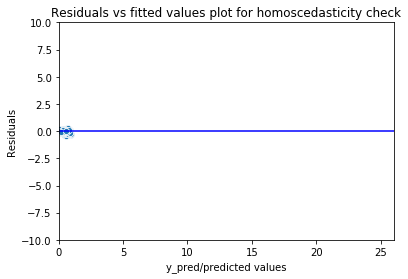

In [34]:
# Error term have constant variance.

p = sns.scatterplot(y_train_cnt,(y_train['cnt'] - y_train_cnt))
plt.xlabel('y_pred/predicted values')
plt.ylabel('Residuals')
plt.ylim(-10,10)
plt.xlim(0,26)
p = sns.lineplot([0,26],[0,0],color='blue')
p = plt.title('Residuals vs fitted values plot for homoscedasticity check')
np.mean(y_train['cnt'] - y_train_cnt)